In [48]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Tag

In [50]:
def remove_hidden(l):
    return [el for el in l if el[0] != "."]

def get_relative_path_to_dirs(start_path):
    subdirs = [x[1] for x in os.walk(start_path)][0]
    subdirs = remove_hidden(subdirs)
    subdirs = [start_path + "/" + subdir for subdir in subdirs]
    return subdirs

def get_relative_path_to_files(start_path):
    files = [f for f in listdir(start_path) if isfile(join(start_path, f))]
    files = remove_hidden(files)
    files = [start_path + "/" + file for file in files]
    return files

In [51]:
home_articles_directory = "../articles"

subdirs = get_relative_path_to_dirs(home_articles_directory)
subdirs

['../articles/medium',
 '../articles/tutorialspoint',
 '../articles/wikihow',
 '../articles/kdnuggets',
 '../articles/smartdatacollective']

In [52]:
data = {}

for subdir in subdirs:
    subsubdirs = get_relative_path_to_dirs(subdir)
    sub_data = {}
    for subsubdir in subsubdirs:
        onlyfiles = get_relative_path_to_files(subsubdir)
        read_json_list = []
        for file in onlyfiles:
            with open(file, 'r') as infile:
                d = json.load(infile)
                read_json_list.append(d)
        sub_data[subsubdir] = read_json_list
    data[subdir] = sub_data

## Number of scraped tutorials per website

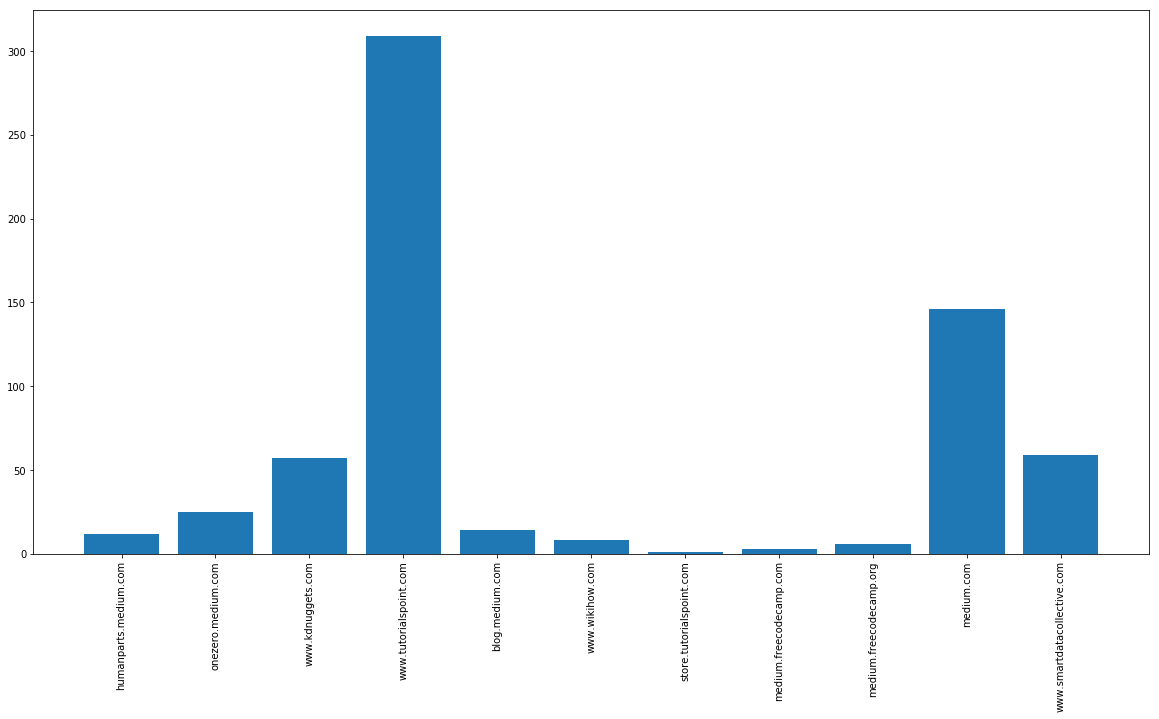

In [53]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average lenght of title html per website

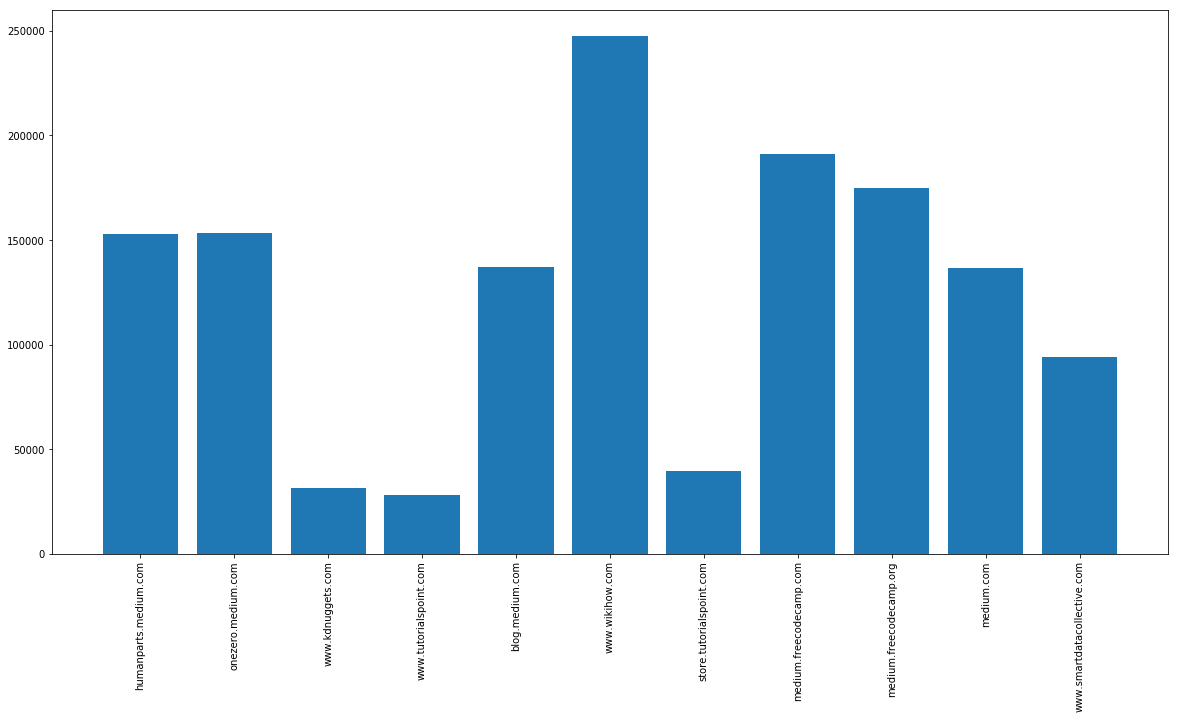

In [54]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["html"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average title length per website

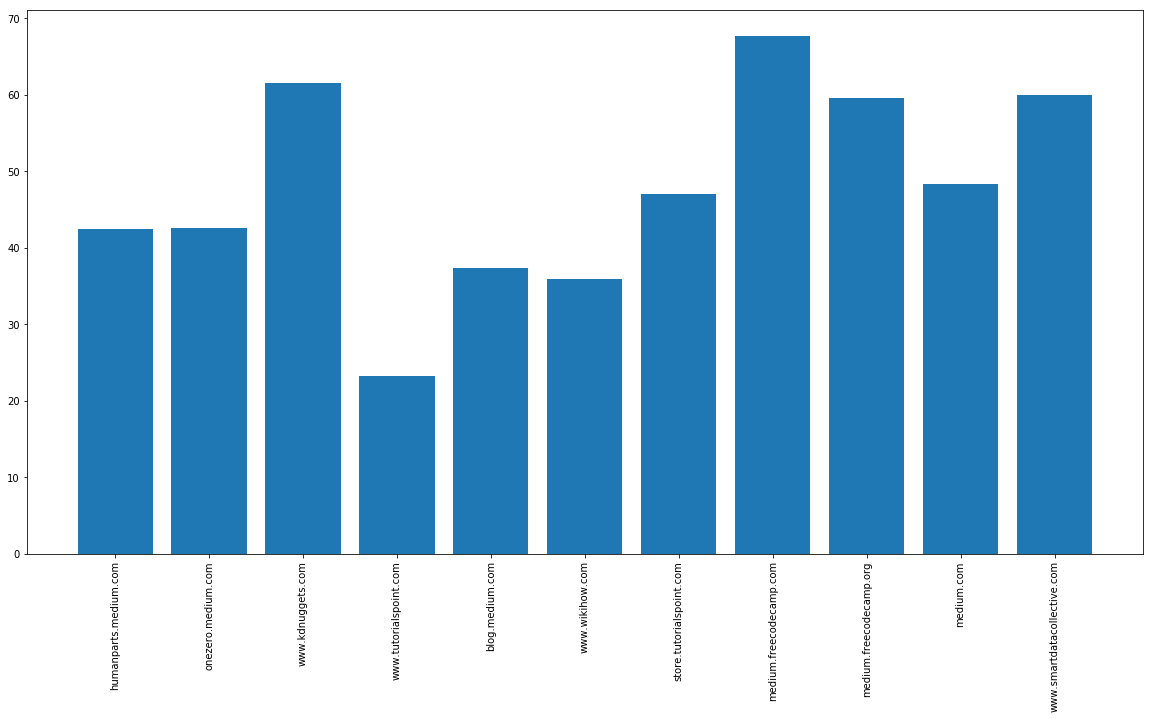

In [55]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

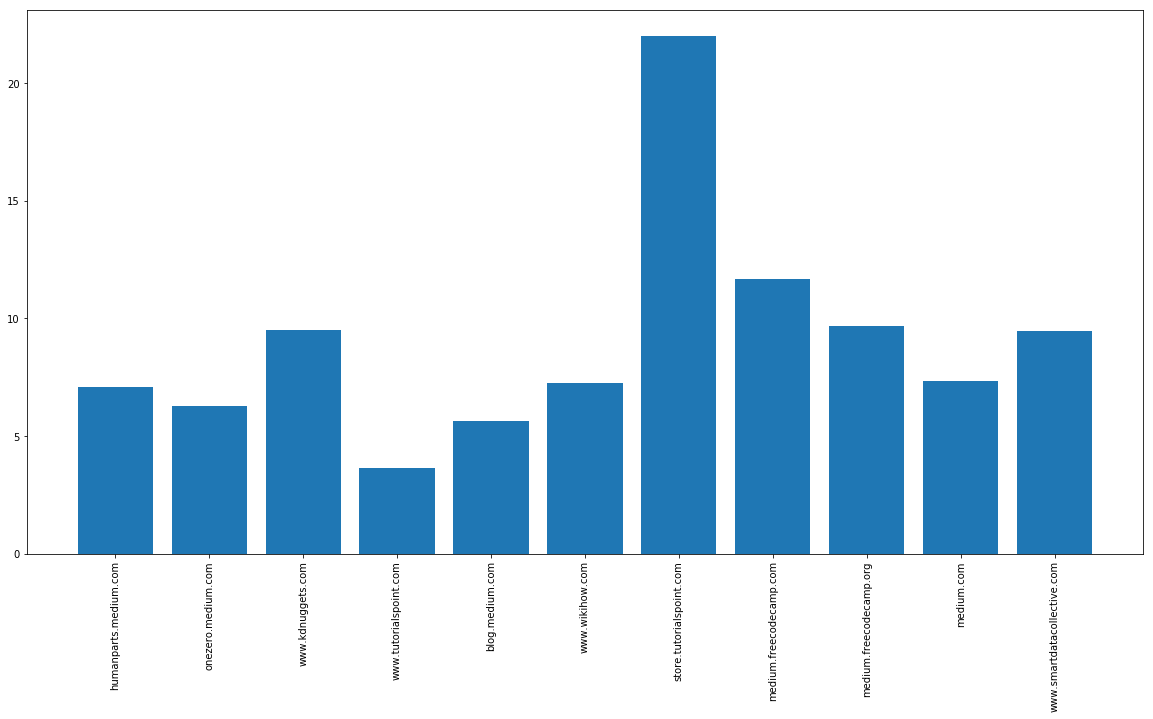

In [66]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"].split(" ")) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Sample titles

In [56]:
import random

In [57]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        titles_and_urls = [(el["title"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for t,u in titles_and_urls:
            print(t + " --> " + u)
        print("---------")

../articles/kdnuggets/www.kdnuggets.com:
R, Python Duel As Top Analytics, Data Science software – KDnuggets 2016 Software Poll Results --> https://www.kdnuggets.com/2016/06/r-python-top-analytics-data-mining-data-science-software.html
How to Choose the Right Chart Type --> https://www.kdnuggets.com/2019/03/how-choose-right-chart-type.html
Texas A&M Institute of Data Science: Staff Data Scientist [College Station, TX] --> https://www.kdnuggets.com/jobs/19/03-21-texas-am-institute-data-science-data-scientist.html
XAI – A Data Scientist’s Mouthpiece --> https://www.kdnuggets.com/2019/04/xai-data-scientist.html
Gain the Skills You Need to Level-Up in Your Data-Driven Career --> https://www.kdnuggets.com/2019/03/delaware-gain-skills-need-data-driven-career.html
---------
../articles/tutorialspoint/store.tutorialspoint.com:
E-Book Store
                  
  Categories 

 --> https://store.tutorialspoint.com
E-Book Store
                  
  Categories 

 --> https://store.tutorialspoint.com


## Sample article HTML tag chains

In [38]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        chtml_and_urls = [(el["content_html"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for chtml,u in chtml_and_urls:
            soup = BeautifulSoup(chtml)
            chain = list(list(soup.select("body")[0].descendants)[0].descendants)
            chain_list = []
            for el in chain:
                if type(el) == Tag:
                    chain_list.append(el.name)
            print(" ".join(chain_list) + " ---> " + u)
        print("---------")

../articles/tutorialspoint/store.tutorialspoint.com:
h1 div a i i div ul li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i li a i div div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span img div div div br a b a b i div div a span

## Queue length

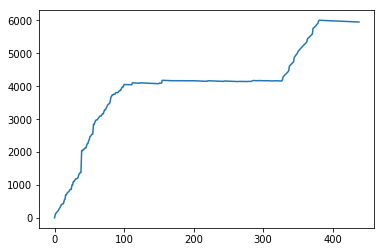

In [39]:
#queue_length = ...

#plt.plot(range(len(queue_length)), queue_length)

## Assign a duration to each article

Duration depends on content length.

In [46]:
wps = 200 / 60 # = 3.33 

for k1,v1 in data.items():
    for k2,v2 in v1.items():
        for i,f in enumerate(v2):
            num_of_words = len(f["content"].split(" "))
            read_time = num_of_words / wps
            f["read_time"] = read_time

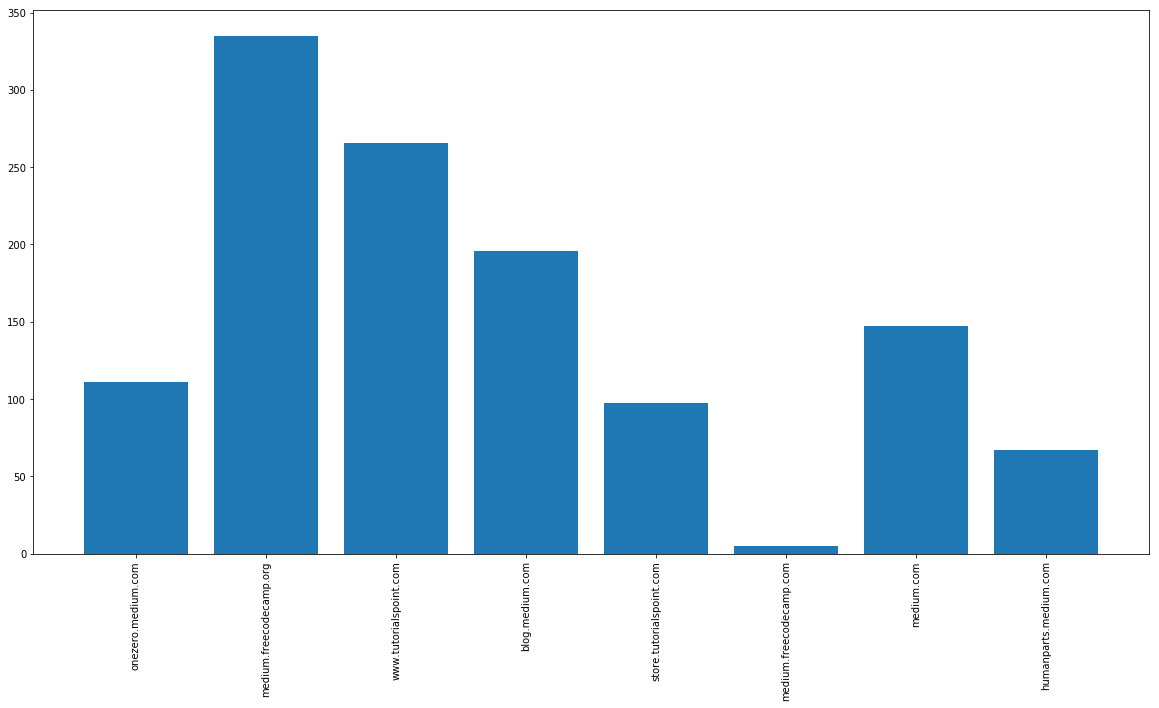

In [47]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([j["read_time"] for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

In [61]:
list(data["../articles/wikihow"].keys())

['../articles/wikihow/www.wikihow.com']